In [ ]:
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
image = '/content/drive/MyDrive/2024-08-30_10h27_14.png'

(472, 631, 4)

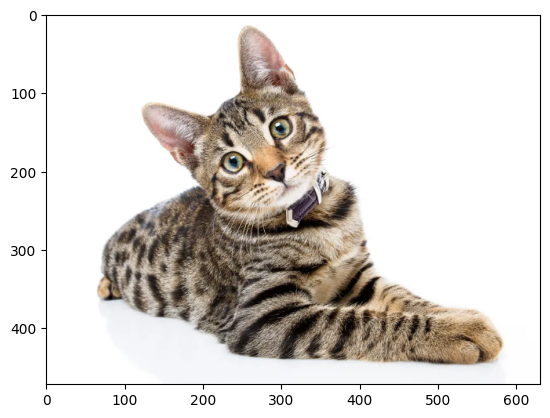

In [ ]:
from matplotlib.image import imread

import os
image = imread(os.path.join('/content/drive/MyDrive/2024-08-30_10h27_14.png'))
plt.imshow(image)
image.shape

In [ ]:
image.shape

(472, 631, 4)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


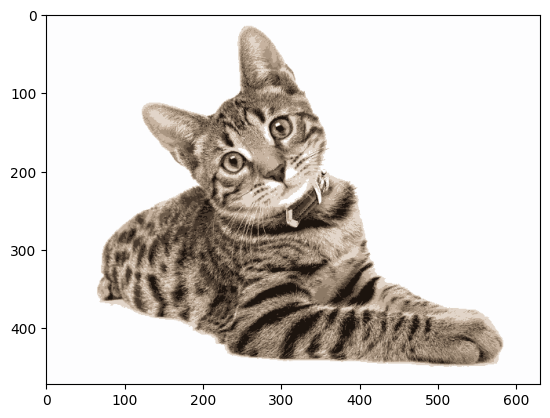

In [ ]:
from sklearn.cluster import KMeans
X             = image.reshape(-1, 4)
kmeans        = KMeans(n_clusters=8, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)
plt.imshow(segmented_img)

In [ ]:
X

array([[1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        ],
       ...,
       [0.99607843, 0.99607843, 0.99607843, 1.        ],
       [0.99607843, 0.99607843, 0.99607843, 1.        ],
       [0.99607843, 0.99607843, 0.99607843, 1.        ]], dtype=float32)

In [ ]:
height, width, channels = 472, 631, 4


# Crear los índices de las filas y columnas usando np.kron
vr = np.linspace(0,height,height, endpoint=False)
vc = np.linspace(0,width,width, endpoint=False)
row_indices = np.kron(vr.reshape(-1,1), np.ones((1,width), dtype=int))
col_indices = np.kron(np.ones((height,1), dtype=int), vc.reshape(-1,1))
row_indices = row_indices.reshape(-1)
col_indices = col_indices.reshape(-1)
# Agregar los índices de fila y columna como nuevas columnas a la matriz X
X_with_indices = np.column_stack((X, row_indices, col_indices))

# Ver el resultado
print(X_with_indices)

[[  1.           1.           1.           1.           0.
    0.        ]
 [  1.           1.           1.           1.           0.
    1.        ]
 [  1.           1.           1.           1.           0.
    2.        ]
 ...
 [  0.99607843   0.99607843   0.99607843   1.         471.
  628.        ]
 [  0.99607843   0.99607843   0.99607843   1.         471.
  629.        ]
 [  0.99607843   0.99607843   0.99607843   1.         471.
  630.        ]]


In [ ]:
X_with_indices.shape

(297832, 6)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Instanciar el escalador
scaler = MinMaxScaler()

# Aplicar el escalador a X_with_indices
X_scaled = scaler.fit_transform(X_with_indices)

print(X_scaled)


[[1.         1.         1.         0.         0.         0.        ]
 [1.         1.         1.         0.         0.         0.0015873 ]
 [1.         1.         1.         0.         0.         0.0031746 ]
 ...
 [0.99607843 0.99607843 0.99607843 0.         1.         0.9968254 ]
 [0.99607843 0.99607843 0.99607843 0.         1.         0.9984127 ]
 [0.99607843 0.99607843 0.99607843 0.         1.         1.        ]]


<function matplotlib.pyplot.show(close=None, block=None)>

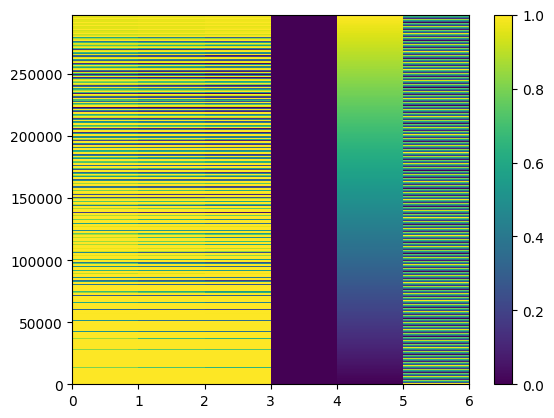

In [ ]:
plt.pcolormesh(X_scaled)
plt.colorbar()
plt.show

In [ ]:
from sklearn.cluster import KMeans
k      = 4
kmeans = KMeans(n_clusters=k, random_state=42, init='k-means++')
y_pred = kmeans.fit_predict(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
k_centers = kmeans.cluster_centers_
k_centers

array([[0.95279914, 0.95103258, 0.95089055, 0.        , 0.83976563,
        0.22990108],
       [0.97769061, 0.96672085, 0.95849685, 0.        , 0.22662587,
        0.24587861],
       [0.98980658, 0.98585505, 0.98121639, 0.        , 0.43192643,
        0.80239223],
       [0.47339264, 0.40645155, 0.3405881 , 0.        , 0.64180248,
        0.4614427 ]])

In [ ]:
from scipy.spatial import distance

k_dist = distance.cdist(X_scaled, k_centers)
k_min = np.argmin(k_dist, axis=0)

In [ ]:
k_min

array([250020,  70823, 128599, 190228])

In [ ]:
elements = X[k_min]

print(elements)

[[0.94509804 0.9490196  0.9647059  1.        ]
 [0.98039216 0.9647059  0.9647059  1.        ]
 [1.         1.         1.         1.        ]
 [0.4627451  0.40392157 0.34117648 1.        ]]


In [ ]:
y_pred = kmeans.fit_predict(X)
X_reconstructed = elements[y_pred]
X_reconstructed = X_reconstructed.reshape(image.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
X_reconstructed.shape

(472, 631, 4)

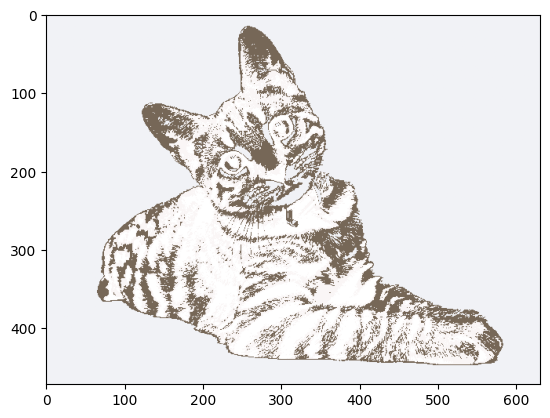

In [ ]:
plt.imshow(X_reconstructed)

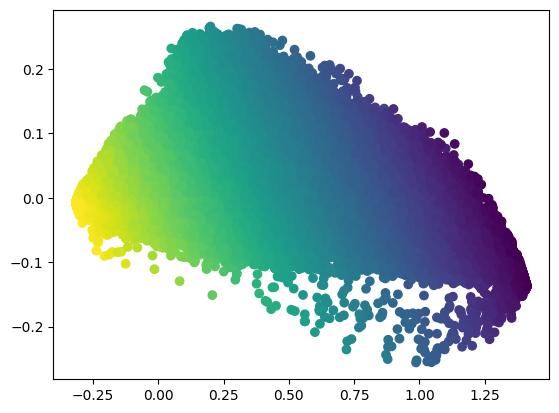

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_ = scaler.fit_transform(X)
X_ = PCA(n_components=2).fit_transform(X_)
plt.scatter(X_[:, 0], X_[:, 1], c=X[:, 2])
plt.show()

In [ ]:
!pip install UMAP-learn

In [ ]:
from umap import UMAP

X_ = scaler.fit_transform(X)
X_ = UMAP(n_components=2, n_neighbors= 30, min_dist= 0.9).fit_transform(X_)

In [ ]:
from sklearn.cluster import KMeans
k      = 4
kmeans = KMeans(n_clusters=k, n_init='auto').fit(X_)
kmeans.labels_

array([1, 1, 1, ..., 2, 2, 2], dtype=int32)

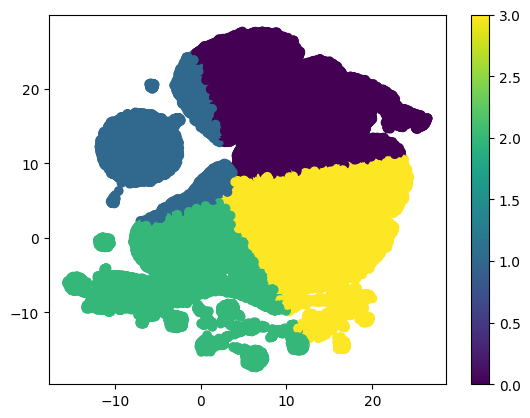

In [ ]:
plt.scatter(X_[:, 0], X_[:, 1], c=kmeans.labels_)
plt.colorbar()
plt.show()

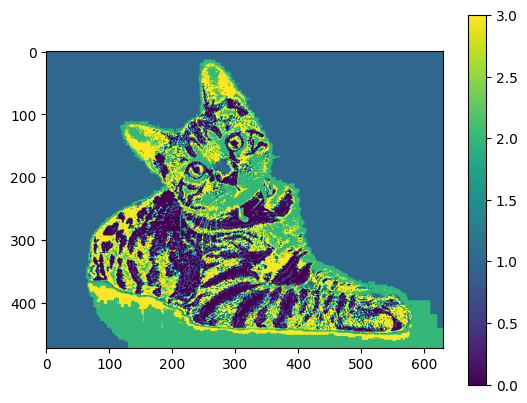

In [ ]:
labels_ = kmeans.labels_
Ilabels = labels_.reshape(height, width)
plt.imshow(Ilabels)
plt.colorbar()
plt.show()

In [ ]:
D_ = kmeans.transform(X_)
D_.shape
ind_ = np.argmin(D_, axis=0)
ind_.shape

(4,)